In [1]:
import pandas, seaborn, os, numpy

import sklearn, sklearn.cluster
import scipy, scipy.stats

In [2]:
%matplotlib inline
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6), 'axes.labelsize':20})

# 0. user-defined variables

In [3]:
home_dir = '/Users/adrian/'

In [4]:
partial_wound_metabolic_file = '/Users/adrian/gd15/hi/research/kerecis_metabolomics_new/data/clusters/df_logFC_comb_partial.csv'

annotation_file = '/home/adrian/gd15/hi/research/kerecis/data/clusters/Table 1- Adrian.xlsx'
annotation_file = '/home/adrian/gd15/hi/research/kerecis/data/clusters/Table 1 Updated.xlsx'
annotation_partial_file = '/Users/adrian/gd15/hi/research/kerecis_metabolomics_new/data/clusters/new_annotation/Table 1.xlsx'
annotation_full_file = '/Users/adrian/gd15/hi/research/kerecis_metabolomics_new/data/clusters/new_annotation/Table 2.xlsx'

In [5]:
days = [7, 14, 21, 28, 60]

# 1. read data

## 1.1. metabolite quantification

In [6]:
profiles = pandas.read_csv(partial_wound_metabolic_file, index_col=0)

print(profiles.shape)
profiles.head()

(318, 5)


,07,14,21,28,60
mz,,,,,
62.02452_pos,1.007395,1.237854,0.660272,0.474187,0.336748
71.02976_pos,0.697690,0.957674,0.366378,0.228073,0.003009
73.53242_pos,1.058873,1.265585,0.690517,0.497685,0.337213
76.04001_pos,1.625106,1.761488,1.705355,1.212304,0.492153
78.99967_pos,0.644034,1.071242,0.279089,0.282917,0.138536


In [7]:
zscore_profiles = pandas.DataFrame(scipy.stats.zscore(profiles, axis=1), index=profiles.index)

print(zscore_profiles.shape)
zscore_profiles.head()

(318, 5)


,07,14,21,28,60
mz,,,,,
62.02452_pos,0.789916,1.479203,-0.248305,-0.804872,-1.215942
71.02976_pos,0.728653,1.495218,-0.248226,-0.656020,-1.319625
73.53242_pos,0.836190,1.434499,-0.229984,-0.788117,-1.252588
76.04001_pos,0.560230,0.847658,0.729356,-0.309756,-1.827487
78.99967_pos,0.475527,1.738343,-0.603238,-0.591923,-1.018710


In [8]:
print(zscore_profiles.iloc[2, :])
print(numpy.mean(zscore_profiles.iloc[2, :]))
print(numpy.std(zscore_profiles.iloc[2, :]))

07    0.836190
14    1.434499
21   -0.229984
28   -0.788117
60   -1.252588
Name: 73.53242_pos, dtype: float64
8.881784197001253e-17
1.0


## 1.2. read annotation

In [9]:
# annotation_partial = pandas.read_excel(annotation_file, sheet_name='DPT wounds')
# annotation_full = pandas.read_excel(annotation_file, sheet_name='FT wounds')

# annotation_partial.drop(columns=['Identification Method', 'Common Fragments '], inplace=True)
# annotation_full.drop(columns=['Identification Method', 'Common Fragments ', 'Unnamed: 6', 'Unnamed: 7'], inplace=True)

# print(annotation_partial.shape)
# print(annotation_full.shape)

# annotation_partial.head()

In [10]:
annotation_partial = pandas.read_excel(annotation_partial_file, sheet_name='DPT wounds', skiprows=1, usecols=['mode', 'm/z', 'Retention time', 'Metabolite'])
print(annotation_partial.shape)
annotation_partial.head()

(25, 4)


,Metabolite,mode,m/z,Retention time
0,Hypotaurine,pos/neg,92.01728,4.400000
1,Allantoin,neg,157.03668,3.373333
2,Arginine,pos,175.11927,5.001667
3,Histamine,pos,95.06104,4.743333
4,"3,4-Dihydroxymandelic acid",pos,84.96055,5.806667


In [11]:
annotation_full = pandas.read_excel(annotation_full_file, sheet_name='FT wounds', skiprows=1, usecols=['Ion mode', 'm/z', 'Retention time', 'Metabolite'])
annotation_full.rename(columns={'Ion mode':'mode'}, inplace=True)
print(annotation_full.shape)
annotation_full.head()

(27, 4)


,Metabolite,mode,m/z,Retention time
0,Histamine,pos,95.06082,5.056667
1,Serine,neg,104.03505,4.593333
2,Hypotaurine,pos /neg,110.02764 / 108.01206,4.441667
3,Histidine,pos /neg,156.07728 / 154.06188,5.045000
4,Allantoin,neg,157.03668,3.373333


In [12]:
# join the two annotations
shared_annotation = pandas.concat([annotation_full, annotation_partial])
print(shared_annotation.shape)
shared_annotation.head()

(52, 4)


,Metabolite,mode,m/z,Retention time
0,Histamine,pos,95.06082,5.056667
1,Serine,neg,104.03505,4.593333
2,Hypotaurine,pos /neg,110.02764 / 108.01206,4.441667
3,Histidine,pos /neg,156.07728 / 154.06188,5.045000
4,Allantoin,neg,157.03668,3.373333


In [13]:
# drop duplicates and replace typos
shared_annotation.drop_duplicates(inplace=True)
shared_annotation.shape

shared_annotation.replace({'pos /neg':'pos/neg'}, inplace=True)

shared_annotation

,Metabolite,mode,m/z,Retention time
0,Histamine,pos,95.06082,5.056667
1,Serine,neg,104.03505,4.593333
2,Hypotaurine,pos/neg,110.02764 / 108.01206,4.441667
3,Histidine,pos/neg,156.07728 / 154.06188,5.045000
4,Allantoin,neg,157.03668,3.373333
5,Citrulline,neg,174.08813,4.621667
6,Arginine,pos,175.11927,5.001667
7,Cystathionine,neg,221.06041,5.383333
8,Cytidine,neg,240.92911,4.035000
9,Hydroxyproline,neg,130.05016,4.378333


In [14]:
matching_threshold = 1e-3
modes = ['pos', 'neg', 'pos/neg']
formatted_annotation = {}

for mode in modes:
    
    # build variables that can be compared to annotation
    print('adapting observed features')
    observed_features = [element for element in zscore_profiles.index.to_list() if mode in element]
    observed_features_float = [float(element.split('_')[0]) for element in zscore_profiles.index.to_list() if mode in element]
    
    print(len(observed_features), observed_features[:4])
    print(len(observed_features_float), observed_features_float[:4])
    print()
    
    # iterate annotation to find matches in measured features. should have a match to every single annotation
    annotated = shared_annotation[shared_annotation['mode'] == mode]
    print('annotation shape found:', annotated.shape)
    for element in annotated['m/z']:
        name = annotated[annotated['m/z'] == element]['Metabolite'].values[0]
        
        print('\t working with {} {} {}'.format(mode, element, name))
        for i in range(len(observed_features_float)):
            diff = numpy.abs(element - observed_features_float[i])
            if diff < matching_threshold:
                print('\t\t MATCH:', diff, element, observed_features[i])
                formatted_annotation[observed_features[i]] = name
    
    # pos-neg boundary
    print()
    
for key in formatted_annotation:
    print(key, formatted_annotation[key])
print(len(formatted_annotation))

adapting observed features
208 ['62.02452_pos', '71.02976_pos', '73.53242_pos', '76.04001_pos']
208 [62.02452, 71.02976, 73.53242, 76.04001]

annotation shape found: (30, 4)
	 working with pos 95.06082 Histamine
		 MATCH: 0.00021999999999877673 95.06082 95.06104_pos
	 working with pos 175.11927 Arginine
		 MATCH: 0.0 175.11927 175.11927_pos
	 working with pos 708.63496 S-adenosyl methionine
		 MATCH: 0.0 708.63496 708.63496_pos
	 working with pos 148.0799 Glutamine
		 MATCH: 0.0 148.0799 148.0799_pos
	 working with pos 220.11887 Pantothenic acid
	 working with pos 298.10262 5'-Deoxy-5'-methylthioadenosine  
		 MATCH: 0.0 298.10262 298.10262_pos
	 working with pos 777.8926 Oxidized glutathione
	 working with pos 828.9304 Leukotriene C4
		 MATCH: 0.0 828.9304 828.9304_pos
	 working with pos 118.08662 Valine/Betaine
		 MATCH: 0.0 118.08662 118.08662_pos
	 working with pos 151.98453 Cystine
		 MATCH: 0.0 151.98453 151.98453_pos
	 working with pos 125.98727 3,4-Dihydroxymandelic acid
	 work

# 2. visualization and formatting

In [15]:
print(zscore_profiles.max())
print(zscore_profiles.min())

07    1.933265
14    1.934425
21    1.326718
28    1.369158
60    1.859738
dtype: float64
07   -1.969521
14   -0.599830
21   -1.193971
28   -1.068582
60   -1.942398
dtype: float64


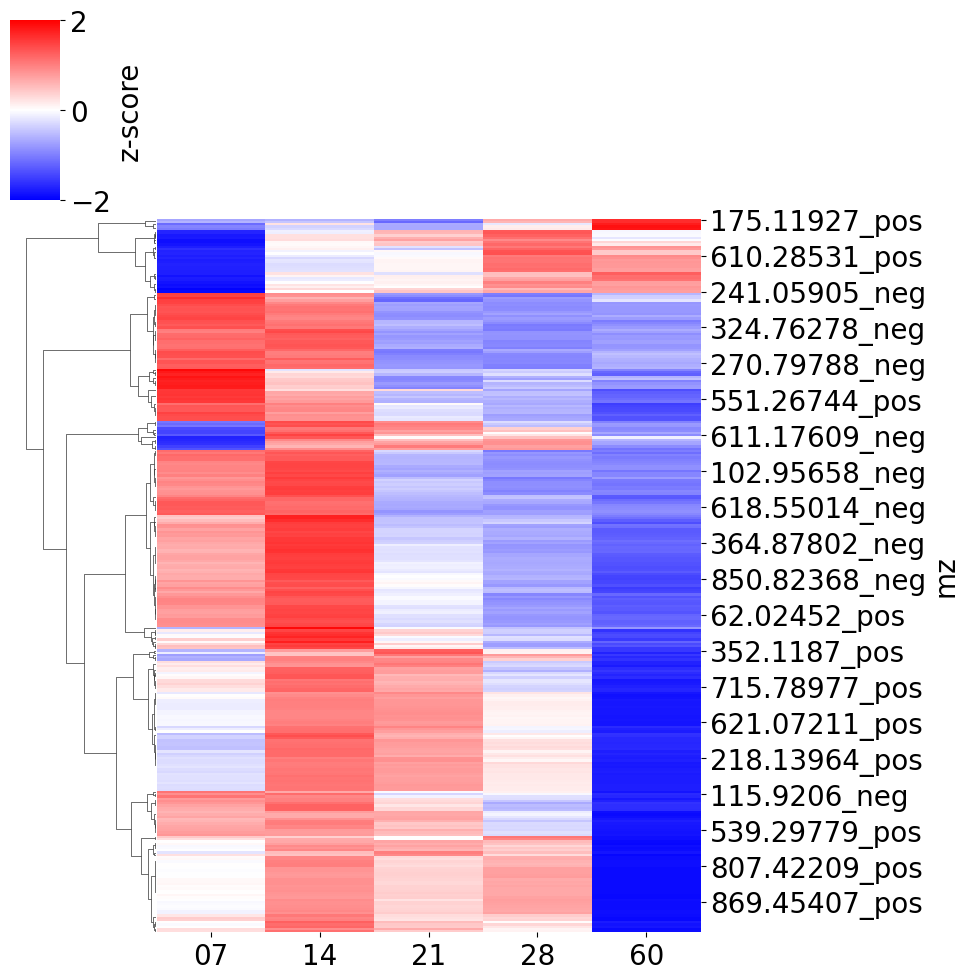

In [16]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.clustermap(zscore_profiles, cmap='bwr', vmin=-2, vmax=2, col_cluster=False, method=linkage_method, metric=distance_metric,  cbar_kws={'label':'z-score'})

In [17]:
x = zscore_profiles.to_numpy()
x

array([[ 0.78991569,  1.47920349, -0.24830472, -0.80487198, -1.21594248],
       [ 0.72865347,  1.49521775, -0.24822649, -0.65602003, -1.31962469],
       [ 0.83619049,  1.43449878, -0.22998377, -0.78811722, -1.25258829],
       ...,
       [ 1.49758667,  0.75753821, -1.19397063, -0.84265083, -0.21850342],
       [ 1.2872932 ,  1.15456587, -0.69353067, -0.85768738, -0.89064102],
       [ 1.39604203,  1.00812373, -1.05223347, -0.75872323, -0.59320906]])

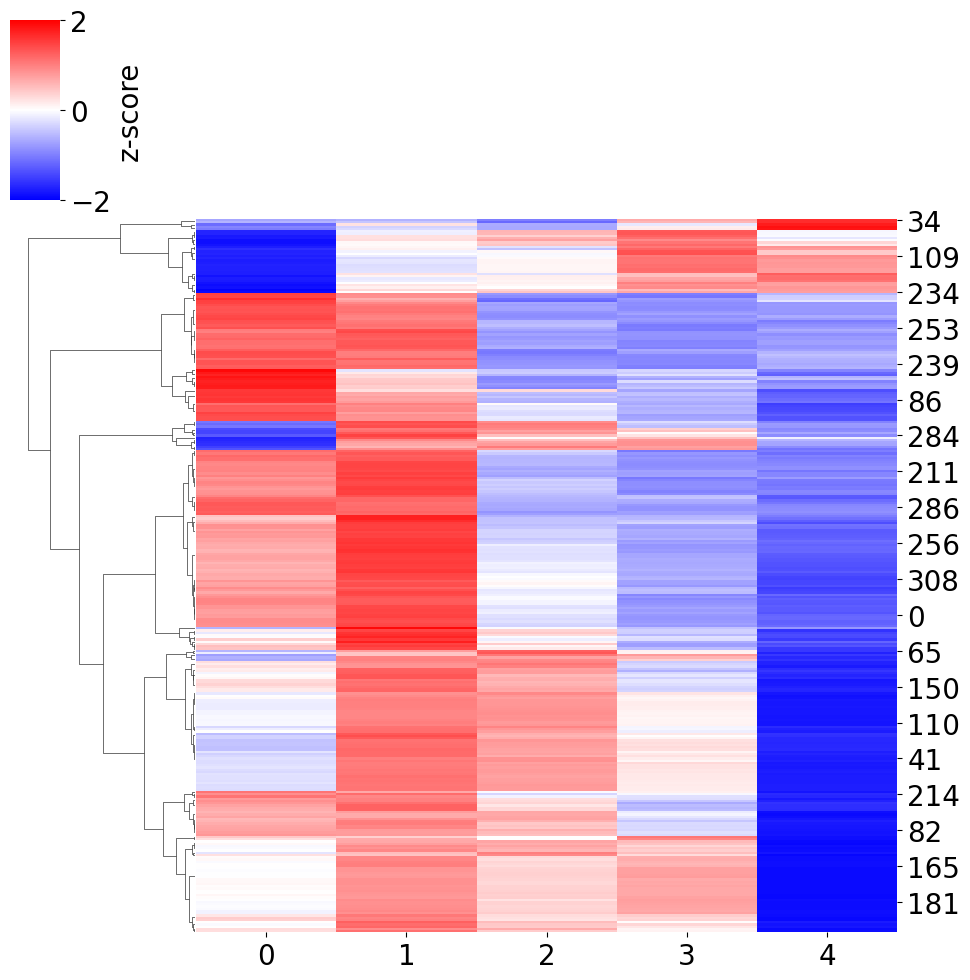

In [18]:
seaborn.clustermap(x, cmap='bwr', vmin=-2, vmax=2, col_cluster=False, method=linkage_method, metric=distance_metric,  cbar_kws={'label':'z-score'})

# 3. analysis

In [19]:
number_elements = zscore_profiles.shape[0]
print('number of elements {}'.format(number_elements))
fine = int(number_elements/5)
coarse = int(number_elements/20)
print(coarse, fine)
k_range = range(coarse, fine+1)

k_range = range(2, 15)

number of elements 318
15 63


2 0.7714169157288052 244.72066717553236 0.5483949657819809
	 0 n = 285
	 1 n = 33
3 0.40129062608742083 241.9577029273561 0.7849047780438466
	 0 n = 228
	 1 n = 33
	 2 n = 57
4 0.35158736376769634 212.7563647385062 0.813315167733144
	 0 n = 215
	 1 n = 33
	 2 n = 57
	 3 n = 13
5 0.5906177460649483 414.64119599516374 0.8078989292993484
	 0 n = 33
	 1 n = 126
	 2 n = 57
	 3 n = 13
	 4 n = 89
6 0.5990508509775474 385.30321306720225 0.7502809735821186
	 0 n = 126
	 1 n = 89
	 2 n = 57
	 3 n = 13
	 4 n = 28
	 5 n = 5

Cluster c0 with 126 gene indices: [  3  18  19  23  26  27  30  32  36  37  38  41  43  44  46  51  52  53
  54  55  57  59  62  65  69  70  71  79  82  88  94  99 100 101 102 103
 104 105 106 107 108 110 111 112 113 114 115 116 117 118 119 120 123 124
 125 126 127 128 129 130 131 140 141 144 145 146 147 148 149 150 151 152
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 189 192 193 194 195
 196 197 

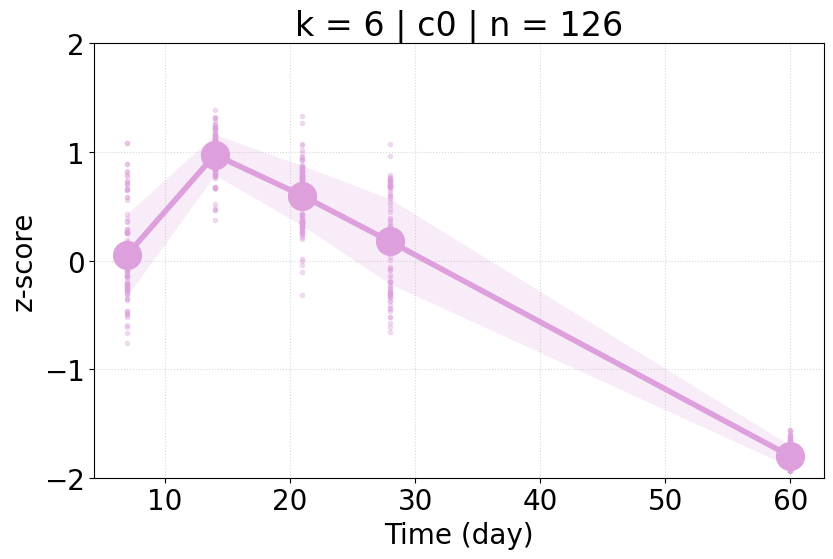


Cluster c1 with 89 gene indices: [  0   1   2   4   5   6   7   8   9  10  14  15  21  22  24  25  28  29
  31  33  39  40  42  47  60  66  67  68  75 136 143 188 190 191 206 207
 210 211 212 215 216 220 221 222 225 226 229 230 231 232 233 240 244 245
 247 248 250 251 256 257 258 260 261 263 264 269 270 271 279 280 281 283
 285 286 287 288 289 293 294 295 296 297 299 302 305 308 311 313 316]

84.96055_pos 3,4-Dihydroxymandelic acid
151.13902_pos Carnosine
238.04632_pos S-Adenosylhomocysteine
887.56535_pos PI(18:2/20:3)
176.93561_neg pyrophosphate
240.92911_neg Cytidine


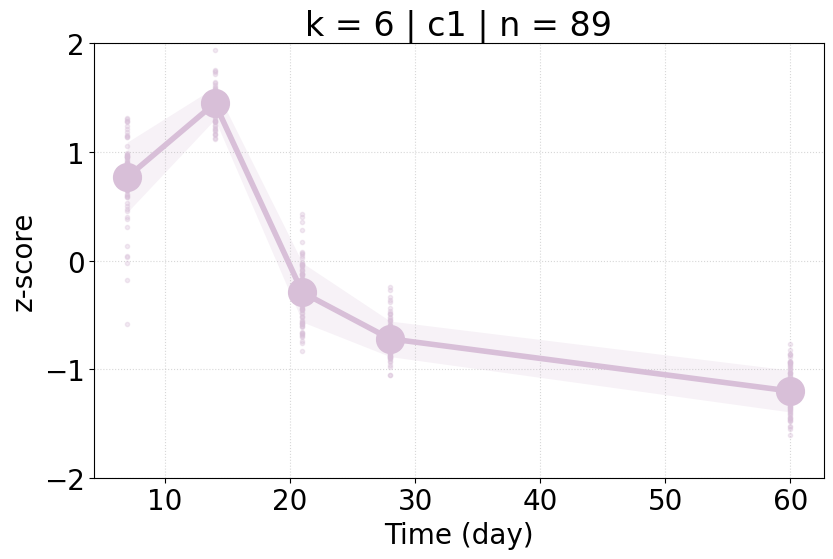


Cluster c2 with 57 gene indices: [ 48  49  56  84  85  86  87  92  93  95  96  97  98 121 122 133 134 135
 142 185 186 187 208 209 217 223 224 238 239 241 242 243 246 253 255 262
 265 268 275 276 277 278 291 292 298 300 301 303 304 306 307 309 310 312
 314 315 317]

282.12202_pos Methyladenosine
564.28772_pos LPC(18:2)
588.63445_pos LPC(20:4)
708.63496_pos S-adenosyl methionine


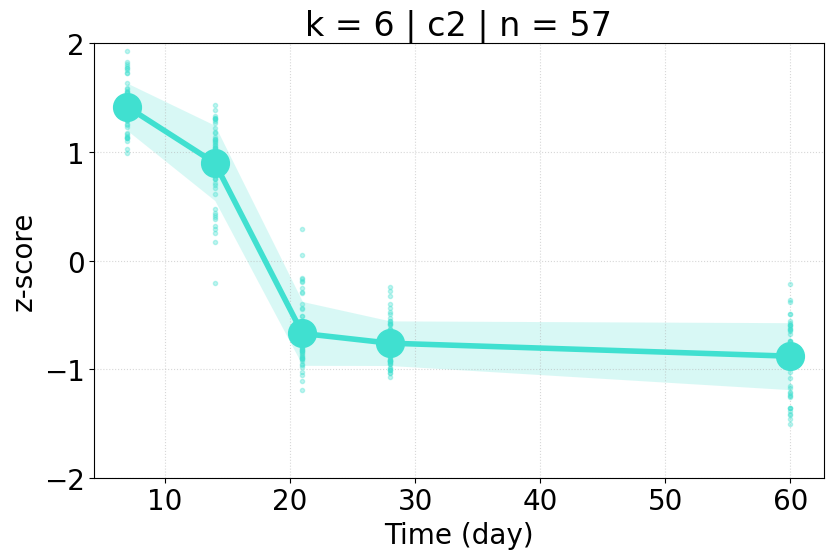


Cluster c3 with 13 gene indices: [ 16  20  45  50 227 235 236 249 254 259 267 274 284]

223.07586_pos Cystathionine
258.11047_pos Glycerophosphocholine
221.06041_neg Cystathionine
242.07918_neg Cytidine


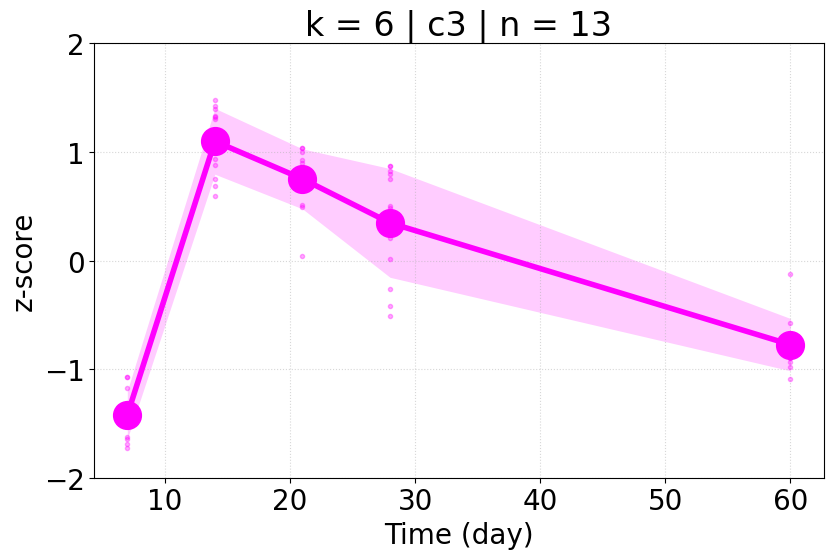


Cluster c4 with 28 gene indices: [ 11  17  58  61  63  64  72  73  74  76  77  78  80  81  83  89  90  91
 109 132 137 138 139 153 213 218 234 252]

108.01206_neg Hypotaurine
157.03668_neg Allantoin


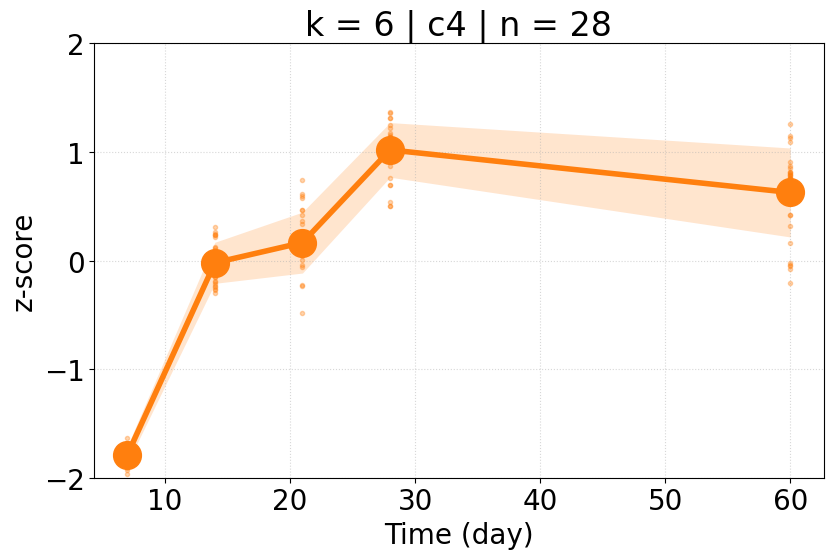


Cluster c5 with 5 gene indices: [ 12  13  34  35 237]

95.06104_pos Histamine
175.11927_pos Arginine


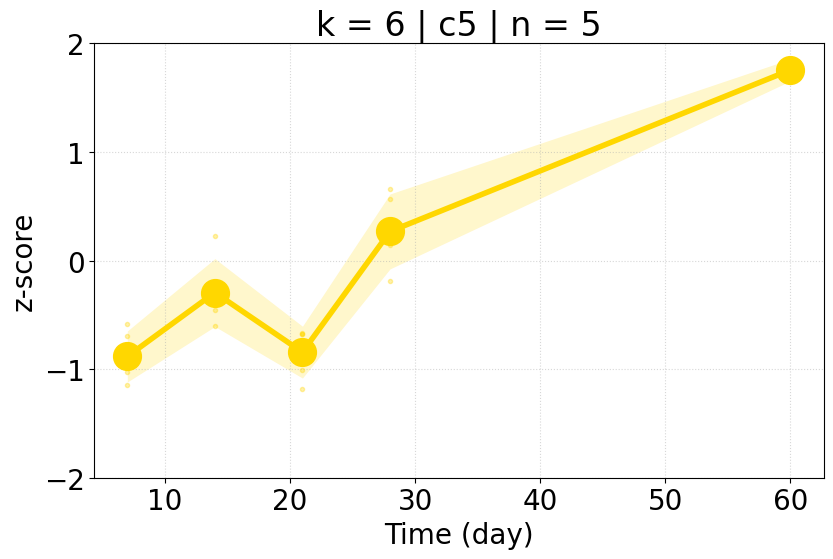

7 0.48176288650511745 373.0343680428852 0.945273282915411
	 0 n = 89
	 1 n = 63
	 2 n = 57
	 3 n = 13
	 4 n = 28
	 5 n = 5
	 6 n = 63
8 0.4607964772922178 351.9672344792269 0.9437618011289887
	 0 n = 57
	 1 n = 63
	 2 n = 63
	 3 n = 13
	 4 n = 28
	 5 n = 5
	 6 n = 10
	 7 n = 79
9 0.4749134536805296 351.12221658977774 0.9087690208418066
	 0 n = 63
	 1 n = 28
	 2 n = 63
	 3 n = 13
	 4 n = 23
	 5 n = 5
	 6 n = 10
	 7 n = 79
	 8 n = 34
10 0.5560488846988608 406.45747661547443 0.7838323482924018
	 0 n = 63
	 1 n = 28
	 2 n = 43
	 3 n = 13
	 4 n = 23
	 5 n = 5
	 6 n = 10
	 7 n = 79
	 8 n = 34
	 9 n = 20
11 0.554198448104725 380.61406853080734 0.839183058477521
	 0 n = 28
	 1 n = 13
	 2 n = 43
	 3 n = 79
	 4 n = 23
	 5 n = 5
	 6 n = 10
	 7 n = 58
	 8 n = 34
	 9 n = 20
	 10 n = 5
12 0.5425847457222995 379.0163072985243 0.8315393195081336
	 0 n = 13
	 1 n = 23
	 2 n = 43
	 3 n = 79
	 4 n = 21
	 5 n = 5
	 6 n = 10
	 7 n = 58
	 8 n = 34
	 9 n = 20
	 10 n = 5
	 11 n = 7
13 0.5464670133115243 368.2

In [20]:
p_ss = []; p_khi = []; p_dbi = []; all_labels = []

for k in k_range:

    partition = sklearn.cluster.AgglomerativeClustering(n_clusters=k, metric='cosine', linkage='complete').fit(x)
    labels = partition.labels_

    ss = sklearn.metrics.silhouette_score(x, labels, metric='cosine')
    khi = sklearn.metrics.calinski_harabasz_score(x, labels)
    dbi = sklearn.metrics.davies_bouldin_score(x, labels)

    print(k, ss, khi, dbi)
    
    p_ss.append(ss)
    p_khi.append(khi)
    p_dbi.append(dbi)
    all_labels.append(labels)
    
    for clusterID in range(k):
        indices = numpy.where(labels == clusterID)[0]
        print('\t {} n = {}'.format(clusterID, len(indices)))        
        
    # 
    # plot trajectories
    #
    if k == 6:
        the_colors = ['plum', 'thistle', 'turquoise', 'magenta', 'tab:orange', 'gold']
        for clusterID in range(k):
            indices = numpy.where(labels == clusterID)[0]
            print('\nCluster c{} with {} gene indices: {}\n'.format(clusterID, len(indices), indices))
            cluster = zscore_profiles.iloc[indices, :]
            means = cluster.mean()
            stds = cluster.std()
            top = means + stds
            bottom = means - stds
            for element in cluster.index:
                if element in formatted_annotation:
                    print(element, formatted_annotation[element])
        
            for metabolite in cluster.index:
                matplotlib.pyplot.plot(days, cluster.loc[metabolite, :], '.', alpha=1/3, lw=3, color=the_colors[clusterID])
            matplotlib.pyplot.plot(days, means, 'o-', color=the_colors[clusterID], lw=4, ms=20)
            matplotlib.pyplot.fill_between(days, top, bottom, color=the_colors[clusterID], alpha=0.2, lw=0)
            
            matplotlib.pyplot.xlabel('Time (day)')
            matplotlib.pyplot.ylabel('z-score')
            matplotlib.pyplot.grid(alpha=0.5, ls=':')
            matplotlib.pyplot.ylim([-2, 2])
            matplotlib.pyplot.title('k = {} | c{} | n = {}'.format(k, clusterID, len(indices)))
            matplotlib.pyplot.tight_layout()
            
            matplotlib.pyplot.show()
            #matplotlib.pyplot.savefig('{}.partial.svg'.format(the_colors[clusterID]))
            #matplotlib.pyplot.clf()

# 4. plotting

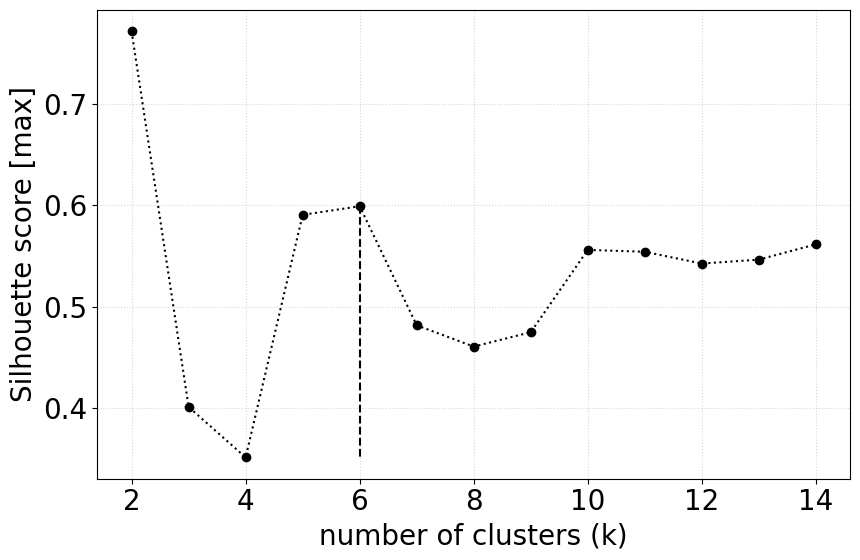

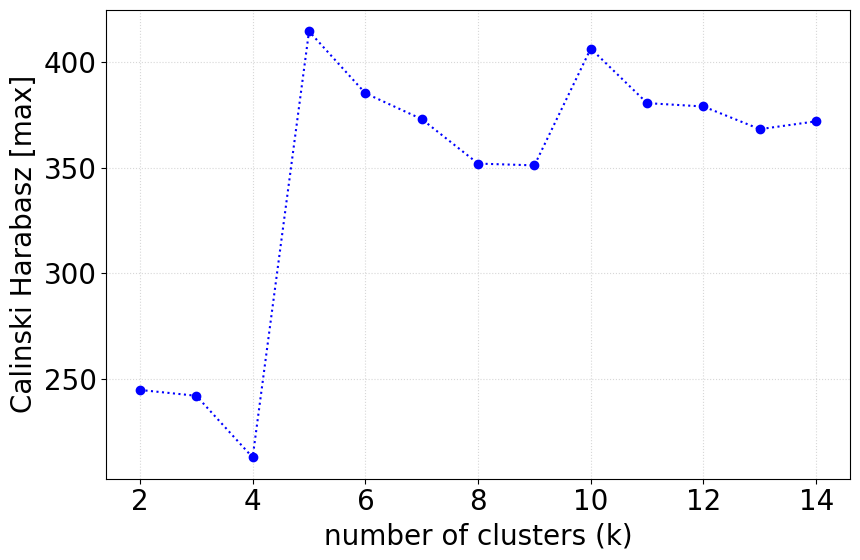

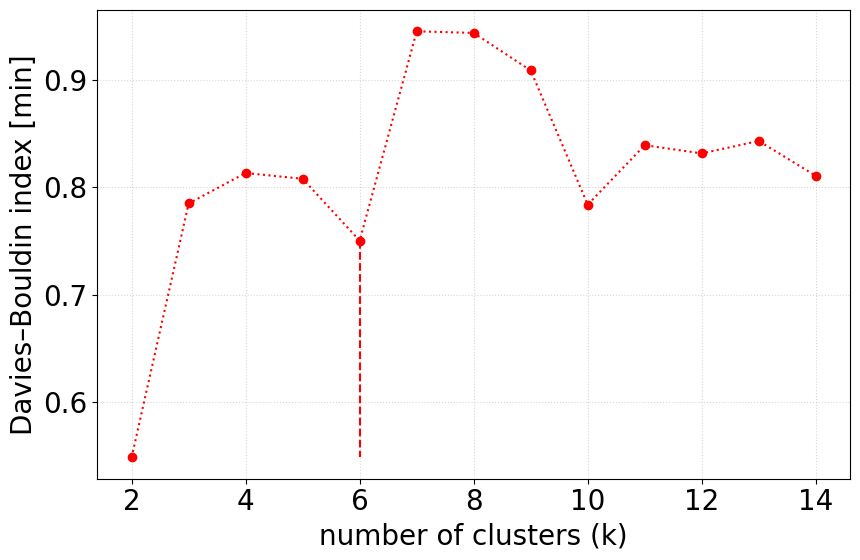

In [21]:
best_partition_index = 4 # which is cluster = 6

matplotlib.pyplot.plot(k_range, p_ss, 'ok')
matplotlib.pyplot.plot(k_range, p_ss, ':', color='black')

a = k_range[best_partition_index]
b = p_ss[best_partition_index]
c= numpy.min(p_ss)
matplotlib.pyplot.plot([a, a], [b, c], '--', color='black')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Silhouette score [max]')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

matplotlib.pyplot.plot(k_range, p_khi, 'ob')
matplotlib.pyplot.plot(k_range, p_khi, ':', color='blue')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Calinski Harabasz [max]')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

matplotlib.pyplot.plot(k_range, p_dbi, 'or')
matplotlib.pyplot.plot(k_range, p_dbi, ':', color='red')

a = k_range[best_partition_index]
b = p_dbi[best_partition_index]
c= numpy.min(p_dbi)
matplotlib.pyplot.plot([a, a], [b, c], '--', color='red')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Davies–Bouldin index [min]')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

## 4.1. heatmap

In [22]:
groupings = all_labels[best_partition_index]
groupings

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5, 1, 1, 3, 4, 0, 0, 3, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 5, 5, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 3, 0, 1, 2, 2, 3, 0, 0, 0, 0, 0, 2, 0, 4, 0, 1, 4, 0, 4, 4, 0,
       1, 1, 1, 0, 0, 0, 4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 0, 4, 2, 2, 2, 2,
       0, 4, 4, 4, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 2, 2, 2, 1, 4, 4, 4, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 4, 0, 1, 1, 2, 4, 0,
       1, 1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 1, 1, 4, 3, 3, 5, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 4, 2, 3, 2, 1, 1, 1, 3, 1, 1, 2, 1,
       1, 2, 0, 3, 2, 1, 1, 1, 0, 0, 3, 2, 2, 2, 2, 1, 1, 1, 0, 1, 3, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,

6


/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_5716/2364816115.py:16: UserWarning: The figure layout has changed to tight
  matplotlib.pyplot.tight_layout()


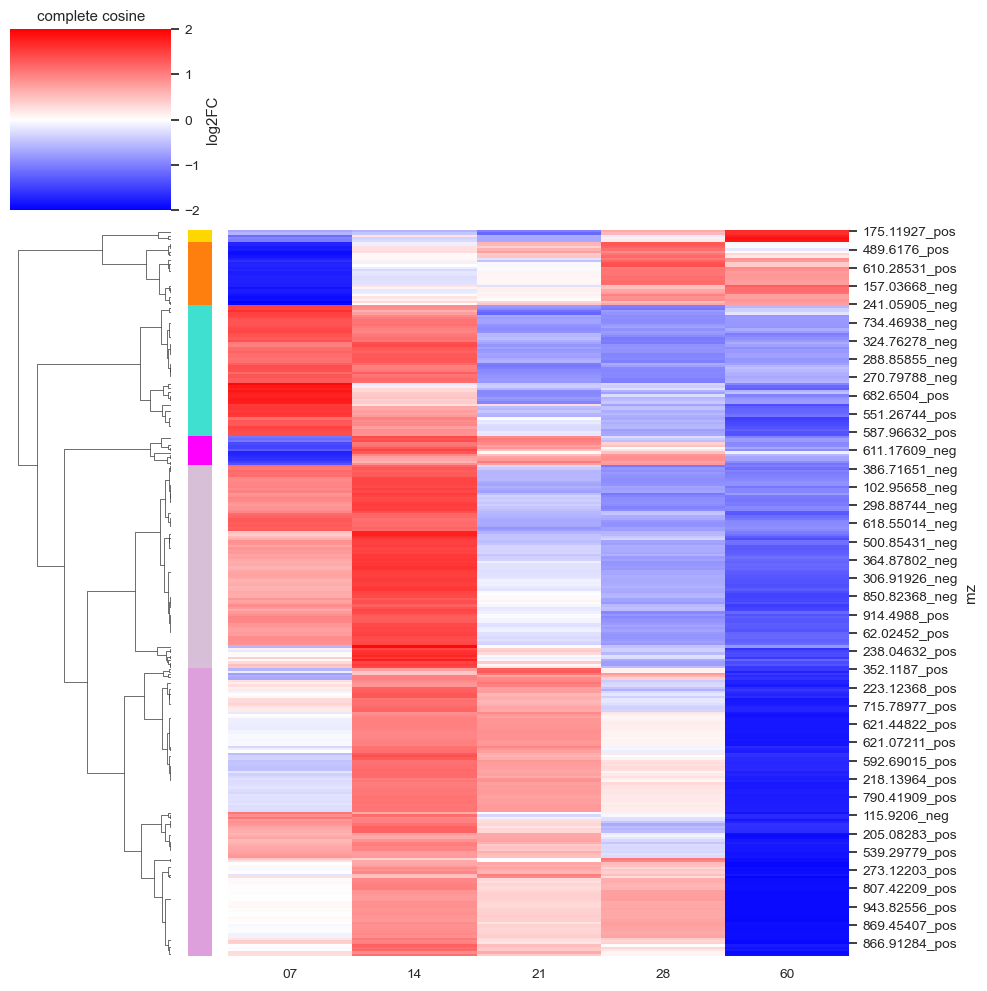

In [23]:
color_options = ['plum', 'thistle', 'turquoise', 'magenta', 'tab:orange', 'gold']
print(len(color_options))

k_colors = []
for i in range(len(zscore_profiles.index)):
  k_colors.append(color_options[groupings[i]])

# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_profiles, cmap='bwr', col_cluster=False, method=linkage_method, metric=distance_metric, cbar_kws={'label':'log2FC'}, row_colors=k_colors,vmin=-2, vmax=2)

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()

#matplotlib.pyplot.savefig('heatmap.partial.svg')
#matplotlib.pyplot.clf()